In [ ]:
#request ->www
#Use beautiful sup -> www as 'lxml'
#corpus sup.find('a' {'name': 'Research papers'}) (also use ' a', 'ol', 'li')
#find next 
#find all
#sth with 'hvet', 'b'

In [189]:
%matplotlib inline
from bs4 import BeautifulSoup
from urllib.request import urlopen
import lxml
import requests
import networkx as nx
import itertools
import matplotlib.pyplot as plt
from collections import Counter
import numpy as np
import re

In [127]:
url = "http://prac.im.pwr.wroc.pl/~hugo/HSC/Publications/Publications"
html2 = urlopen(url)
html = requests.get(url)
soup = BeautifulSoup(html2.read(), 'lxml')

In [215]:
authors = soup.find_all('authors')
for i in range(len(authors)):
    new_list = []
    for j in range(len(authors[i])):
        if authors[i].find_all('author')[j].get('hsc')=='yes':
            author = authors[i].find_all('author')[j].get_text()
            author = re.sub(' ', '', author)
            new_list.append(author)
    authors[i] = new_list

In [134]:
for i in range(len(authors)):
    print(authors[i])

['A.Wylomanska']
['A.Weron']
['A.Weron']
['A.Wylomanska']
['K.Burnecki']
['R.Weron']
['R.Weron']
['R.Weron']
['A. Izydorczyk', 'A.Janicki']
['A.Weron', 'R.Weron']
['A.Weron', 'R.Weron']
['A.Janicki']
['A.Janicki', 'A.Weron']
['D.Kucharczyk']
['J.Ślęzak']
['M.Balcerek']
['T.Zórawik']
['R.Połoczański']
['G.Sikora']
['S.Orzeł']
['J.Gajda']
['Ł.Płociniczak']
['M.Teuerle']
['J.Janczura']
['E. Broszkiewicz-Suwaj']
['M.Magdziarz']
['P. Miśta']
['J. Iwanik']
['M. Borgosz-Koczwara']
['A. Wyłomańska']
['P.Sztuba']
['R.Weron']
['J. Nowicka']
['K. Burnecki']
['A.Rejman']
['Z.Michna']
['K.Podgórski']
['P.Kokoszka']
['K. Burnecki']
['A.Wylomanska', 'G.Sikora']
['A.Grzesiek', 'A.Wylomanska']
['P.Kruczek', 'A.Wylomanska']
['D.Kucharczyk', 'A.Wyłomańska', 'G.Sikora']
['G.Sikora']
['G.Sikora', 'A.Wylomanska']
['A.Wyłomańska', 'G.Sikora', 'M.Teuerle']
['J.Ślęzak', 'M.Magdziarz']
['G.Żak', 'A.Wyłomańska']
['K.Burnecki']
['K.Burnecki', 'G.Sikora']
['A.Fuliński']
['M.Teuerle', 'A.Wyłomańska']
['J.Gajda', 'A

In [238]:
edges = []
for i in range(len(authors)):
    for pair in itertools.combinations(authors[i],2):
        edges.append(tuple(sorted(pair)))

In [239]:
edges_dict = dict()
edges_dict = Counter(edges)

In [241]:
nodes_dict = dict()
for i in range(len(authors)):
    nodes_dict = Counter(authors[i]) + Counter(nodes_dict)

In [302]:
G = nx.Graph()
G.add_nodes_from(list(nodes_dict.keys()))
#G.add_edges_from(list(edges_dict.keys()))
list_of_edges = list(edges_dict.items())
for i in range(len(edges_dict)):
    edge = list_of_edges[i]
    G.add_edge(edge[0][0], edge[0][1], weight = edge[1])
    #G.add_weighted_edges_from()
weights = [G[u][v]['weight'] for u,v in G.edges]

C:\Users\Marcin\AppData\Local\Programs\Python\Python37\lib\site-packages\networkx\drawing\nx_pylab.py:611: MatplotlibDeprecationWarning: isinstance(..., numbers.Number)
  if cb.is_numlike(alpha):


KeyError: 'R.Weron'

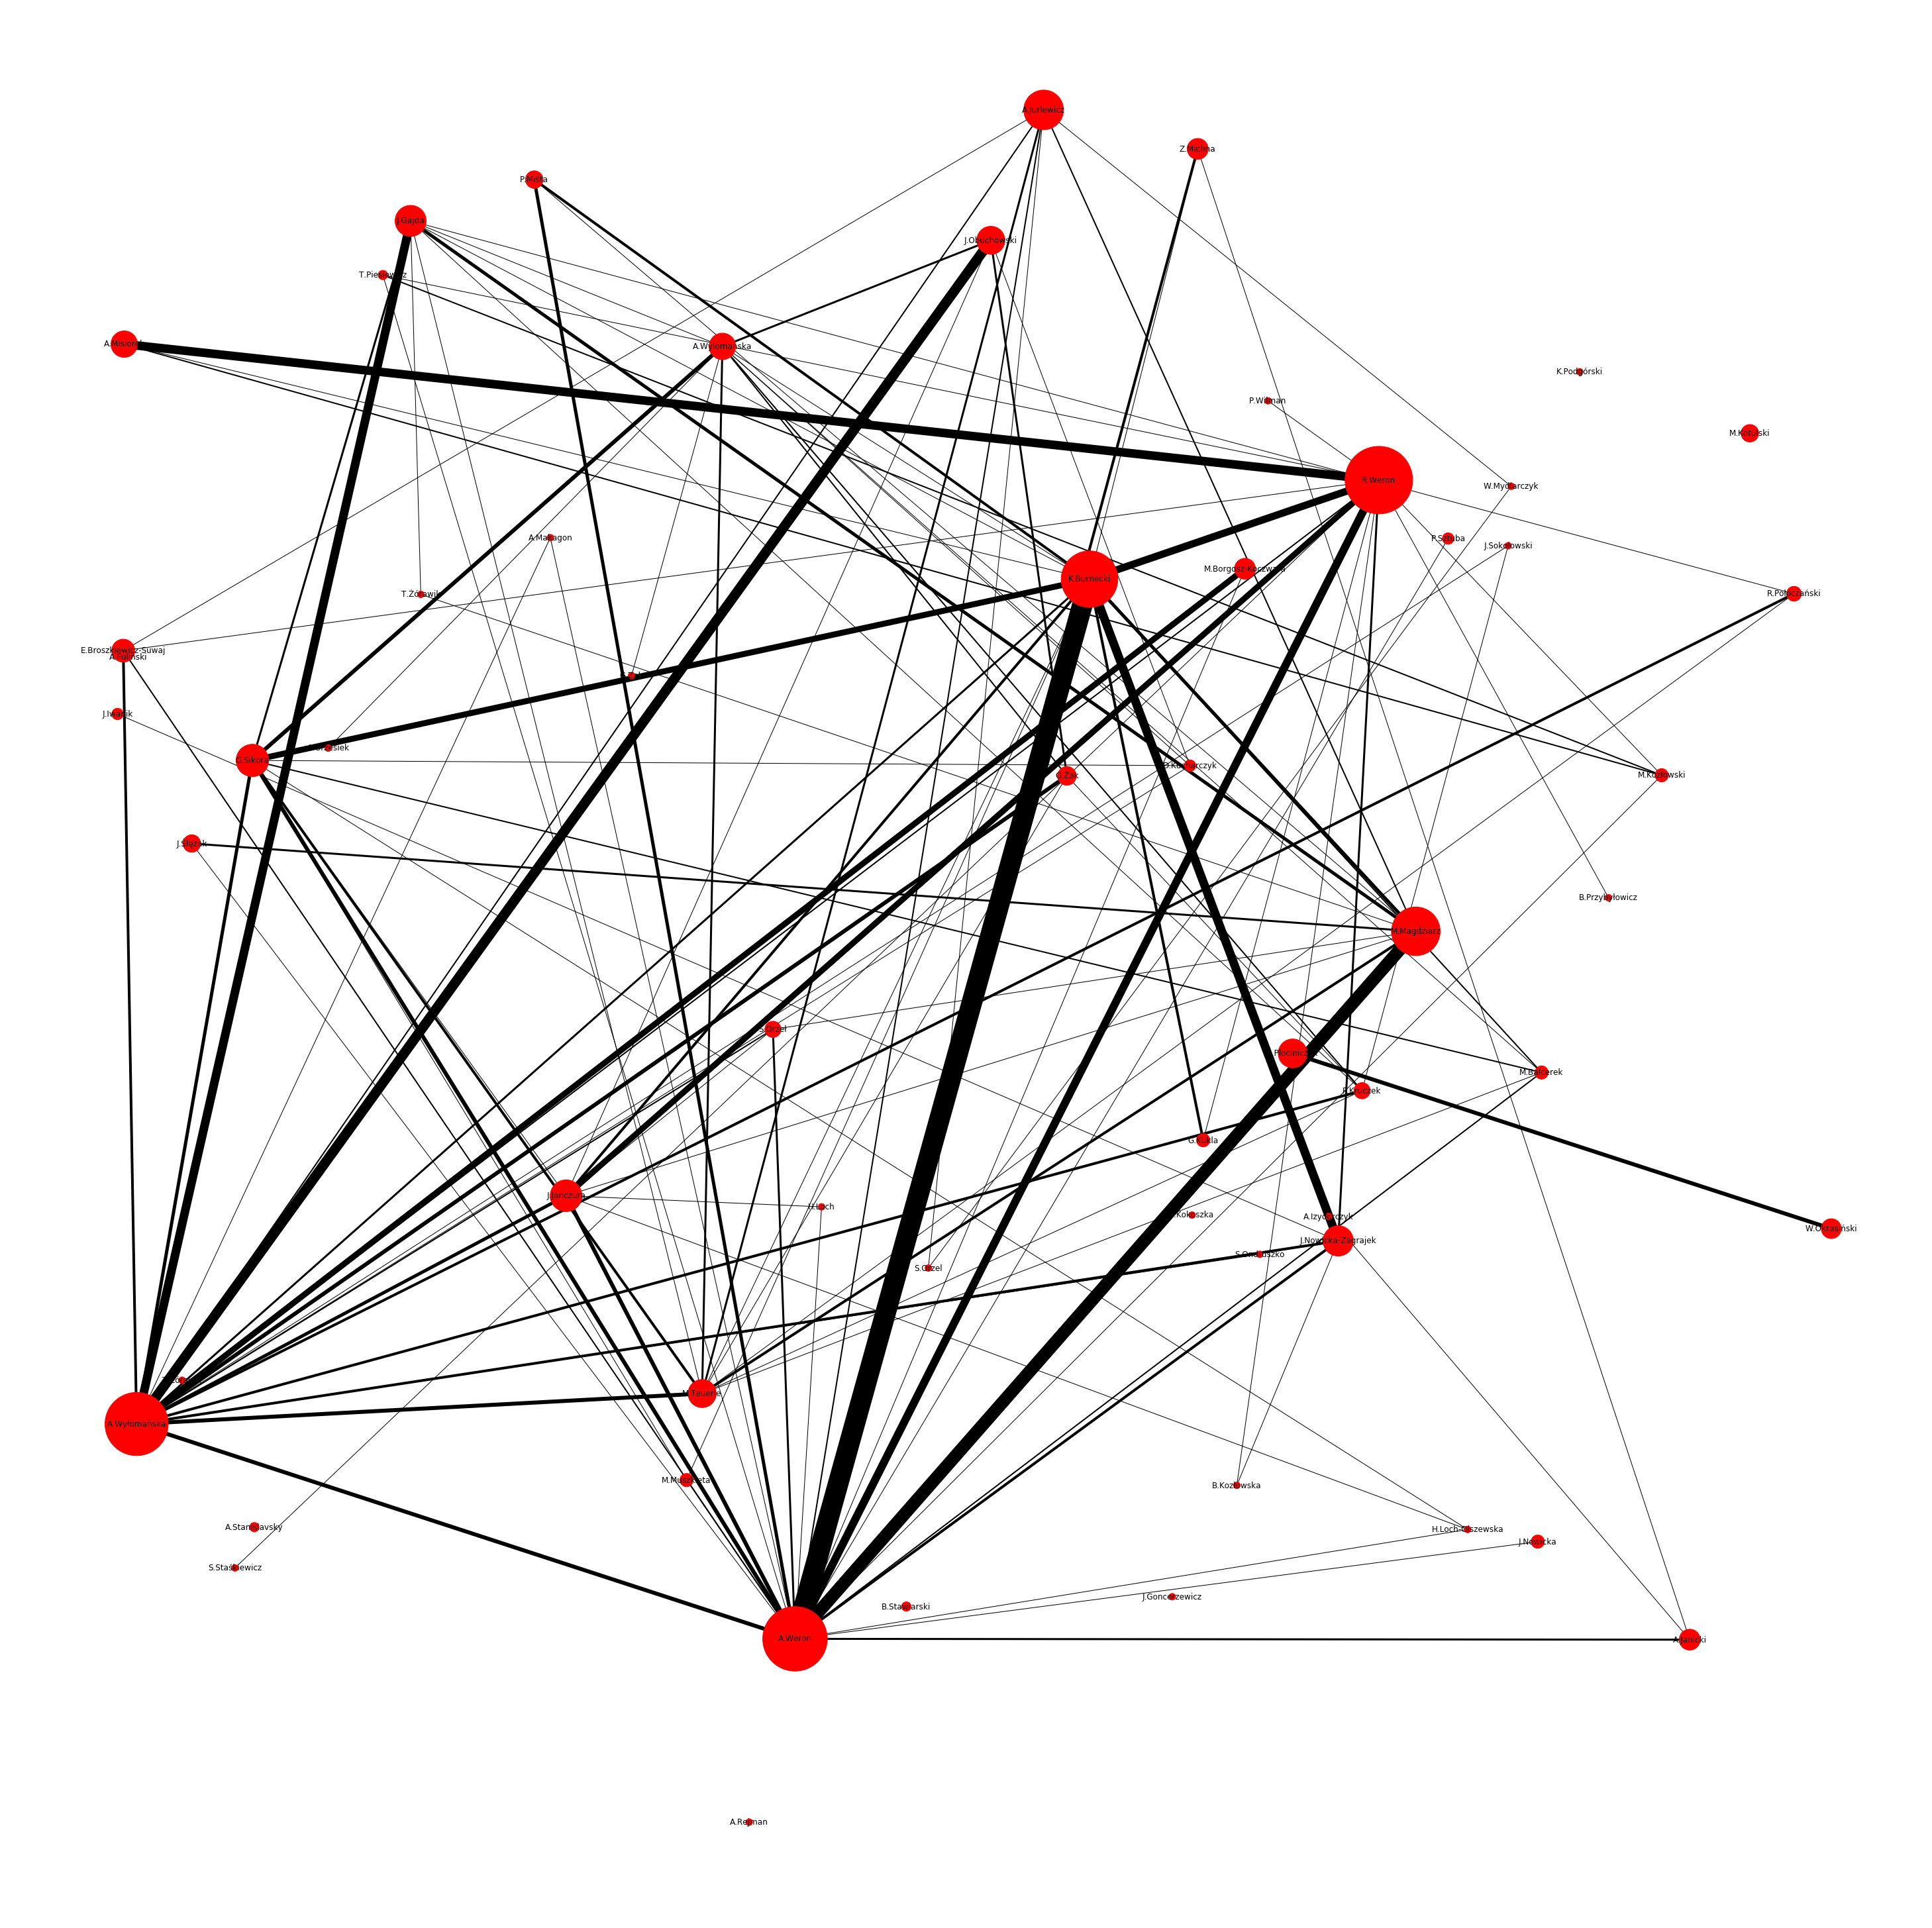

In [315]:
plt.figure(figsize=(40,40))
nx.draw_random(G, with_labels=True, node_size = np.multiply(list(nodes_dict.values()),100), width = weights)
plt.savefig('network.png')
node_pos=nx.get_node_attributes(G,'pos')
edge_labels = nx.get_edge_attributes(G,'weight')
nx.draw_networkx_edges(G, node_pos)
nx.draw_networkx_edge_labels(G,node_pos,edge_labels=edge_labels)

plt.show()